In [ ]:
from zipfile import ZipFile
import numpy as np
import pandas as pd
import os
# from io import StringIO
import io
from PIL import Image
from scipy import misc
import matplotlib.pyplot as plt
import time
import tensorflow as tf
%matplotlib inline

/Users/ajinkyapuar/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [67]:
# zf = ZipFile('data/train.zip', 'r')
# 
# # temp = np.array([])
# temp = []
# 
# for i in range(1, 5):
#     np_img = np.array(Image.open(io.BytesIO(zf.read(zf.namelist()[i]))))
#     print(np_img.shape)
#     rz_img = misc.imresize(np_img, (128, 128))
#     print(rz_img.shape)
#     plt.imshow(rz_img)
#     temp.append(rz_img)
#     
# print(np.asarray(temp).shape)

In [2]:
def load_dataset():
    def load_images(filename):
        if (os.path.exists(filename)):
            # print filename
            np_imgs = []
            zf = ZipFile(filename, 'r')
            # print len(zf.namelist())
            # print(len(zf.namelist()))
            #starting from 1 coz 1st element in namelist is folder name
            for i in range(1, len(zf.namelist())): 
                data = io.BytesIO(zf.read(zf.namelist()[i]))
                img = Image.open(data)
                # np_imgs.append(np.array(img))
                np_imgs.append(misc.imresize(np.array(img), (128,128))) #change 64 * 64
            return np.asarray(np_imgs)

    def load_labels(filename):
        if (os.path.exists(filename)):
            # print filename
            return pd.read_csv(ZipFile(filename, 'r').open('labels.csv'))

    x_train = load_images('data/train.zip')
    y_train = load_labels('data/labels.csv.zip')
    x_test = load_images('data/test.zip')
    return x_train, y_train, x_test

In [4]:
X_train_orig, Y_train_orig, X_test_orig = load_dataset()
print("Dataset Loaded")

# print X_train
# print Y_train

/Users/ajinkyapuar/anaconda/envs/py35/lib/python3.5/site-packages/scipy/misc/pilutil.py:480: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/Users/ajinkyapuar/anaconda/envs/py35/lib/python3.5/site-packages/scipy/misc/pilutil.py:483: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


Dataset Loaded


In [4]:
##################################################################################

(128, 128, 3)


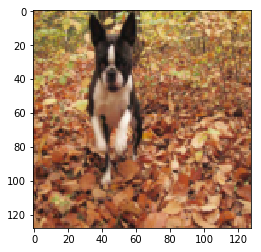

In [5]:
print(X_train_orig[0].shape)
plt.imshow(X_train_orig[0])

(128, 128, 3)


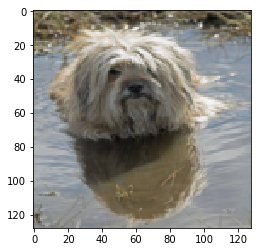

In [7]:
print(X_test_orig[10].shape)
plt.imshow(X_test_orig[10])

In [7]:
##################################################################################

In [8]:
print("Number of training examples (X_Train Original): " + str(len(X_train_orig)))
print("Number of training labels (Y_Train Original): " + str(len(Y_train_orig)))
print("Number of test examples (X_Test Original): " + str(len(X_test_orig)))

Number of training examples (X_Train Original): 10222
Number of training labels (Y_Train Original): 10222
Number of test examples (X_Test Original): 10357


In [9]:
print("X_Train Original shape: " + str(X_train_orig.shape))
print("Y_Train Original shape: " + str(Y_train_orig.shape))
print("X_Test Original shape: " + str(X_test_orig.shape))

X_Train Original shape: (10222, 128, 128, 3)
Y_Train Original shape: (10222, 2)
X_Test Original shape: (10357, 128, 128, 3)


In [10]:
##################################################################################

In [10]:
# Flatten training & test images
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape((X_test_orig.shape[0]), -1).T

print("X_Train Flatten shape: " + str(X_train_flatten.shape))
print("X_Test Flatten shape: " + str(X_test_flatten.shape))

X_Train Flatten shape: (49152, 10222)
X_Test Flatten shape: (49152, 10357)


In [14]:
##################################################################################

In [96]:
# Normalize training & test images
X_train = X_train_flatten/255.
X_test = X_test_flatten/255.

print("X_Train shape: " + str(X_train.shape))
print("X_Test shape: " + str(X_test.shape))

X_Train shape: (49152, 10222)
X_Test shape: (49152, 10357)


In [ ]:
#######################################################################################

In [12]:
Y_sample = pd.read_csv(ZipFile('data/sample_submission.csv.zip', 'r').open('sample_submission.csv'), index_col=0)

In [13]:
Y_sample.head()

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
id,,,,,,,,,,,,,,,,,,,,,
000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [14]:
all_breeds = list(Y_sample.columns)
print(all_breeds)

['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale', 'american_staffordshire_terrier', 'appenzeller', 'australian_terrier', 'basenji', 'basset', 'beagle', 'bedlington_terrier', 'bernese_mountain_dog', 'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound', 'bluetick', 'border_collie', 'border_terrier', 'borzoi', 'boston_bull', 'bouvier_des_flandres', 'boxer', 'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff', 'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua', 'chow', 'clumber', 'cocker_spaniel', 'collie', 'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo', 'doberman', 'english_foxhound', 'english_setter', 'english_springer', 'entlebucher', 'eskimo_dog', 'flat-coated_retriever', 'french_bulldog', 'german_shepherd', 'german_short-haired_pointer', 'giant_schnauzer', 'golden_retriever', 'gordon_setter', 'great_dane', 'great_pyrenees', 'greater_swiss_mountain_dog', 'groenendael', 'ibizan_hound', 'irish_setter', 'irish_terrier', 'iris

In [15]:
Y_train_orig.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [47]:
# Y_train = pd.DataFrame(columns=all_breeds)

In [49]:
# Y_train

In [18]:
Y_train_inter = Y_train_orig.copy(deep=True)

Y_train_inter.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [19]:
# Manipulating breed text into class number 
# TODO: Temp workaround, Find a way to fix this
for i, breed in enumerate(all_breeds):
    Y_train_inter[Y_train_inter['breed'] == breed] = i
    

Y_train_orig['class'] = Y_train_inter['breed']

In [20]:
Y_train_orig.head()

,id,breed,class
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,19
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,37
2,001cdf01b096e06d78e9e5112d419397,pekinese,85
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,15
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,49


In [90]:
#######################################################################################

In [21]:
def sigmoid(z):
    x = tf.placeholder(tf.float32, name="x")
    sigmoid = tf.sigmoid(x)
    with tf.Session() as sess:
        result = sess.run(sigmoid, feed_dict={x: z})
    return result

In [97]:
print("sigmoid(0) = " + str(sigmoid(0)))
print("sigmoid(12) = " + str(sigmoid(12)))

sigmoid(0) = 0.5
sigmoid(12) = 0.9999938


In [ ]:
#######################################################################################

In [98]:
def cost(logits, labels):
    z = tf.placeholder(tf.float32, name="z")
    y = tf.placeholder(tf.float32, name="y")
    
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=z, labels=y)
    
    sess = tf.Session()
    cost = sess.run(cost, feed_dict={z: logits, y: labels})
    sess.close()
    
    return cost

In [99]:
logits = sigmoid(np.array([0.2,0.4,0.7,0.9]))
cost = cost(logits, np.array([0,0,1,1]))
print("Cost = " + str(cost))

Cost = [1.0053872  1.0366409  0.41385433 0.39956614]


In [91]:
#######################################################################################

In [25]:
def one_hot_matrix(labels, C):
    C = tf.constant(C, name='C')
    
    one_hot_matrix = tf.one_hot(labels, depth=C)
    
    sess = tf.Session()
    
    one_hot = sess.run(one_hot_matrix)
    
    sess.close()
    
    return one_hot

In [26]:
l = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(l, C=4)
print("One_hot = " + str(one_hot))

One_hot = [[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [ ]:
#######################################################################################

In [104]:
labels = list(Y_train_orig['class'])

one_hot = one_hot_matrix(labels, C=max(labels)+1)

In [105]:
print(str(one_hot[0]))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


numpy.ndarray

In [59]:
print(labels[0])

19


In [106]:
# sess = tf.Session()
# Y_train = tf.transpose(one_hot).eval(session=sess)
Y_train = one_hot.T
# sess.close()
print(type(Y_train))
print(Y_train.shape)

<class 'numpy.ndarray'>
(120, 10222)


In [ ]:
#######################################################################################

In [30]:
def ones(shape):
    ones = tf.ones(shape)
    
    sess = tf.Session()
    ones = sess.run(ones)
    sess.close()
    
    return ones

In [31]:
print("Ones = " + str(ones([3])))

Ones = [1. 1. 1.]


In [ ]:
#######################################################################################

In [107]:
def create_placeholders(n_x, n_y):
    x = tf.placeholder(tf.float32, [n_x, None], name="X")
    y = tf.placeholder(tf.float32, [n_y, None], name="Y")
    return x, y

In [109]:
X, Y = create_placeholders(X_train.shape[0], max(labels)+1)

print("X = " + str(X))
print("Y = " + str(Y))

X = Tensor("X_2:0", shape=(49152, ?), dtype=float32)
Y = Tensor("Y_2:0", shape=(120, ?), dtype=float32)


In [ ]:
#######################################################################################
# W1 : [25, 49152]
# b1 : [25, 1]
# W2 : [12, 25]
# b2 : [12, 1]
# W3 : [120, 12]
# b3 : [120, 1]

In [110]:
def initialize_parameters():
   W1 = tf.get_variable("W1", [25, 49152], initializer=tf.contrib.layers.xavier_initializer(seed=1))
   b1 = tf.get_variable("b1", [25, 1], initializer=tf.zeros_initializer())
   W2 = tf.get_variable("W2", [12, 25], initializer=tf.contrib.layers.xavier_initializer(seed=1))
   b2 = tf.get_variable("b2", [12, 1], initializer=tf.zeros_initializer())
   W3 = tf.get_variable("W3", [120, 12], initializer=tf.contrib.layers.xavier_initializer(seed=1))
   b3 = tf.get_variable("b3", [120, 1], initializer=tf.zeros_initializer())
   
   parameters = {
                    "W1": W1,
                    "b1": b1,
                    "W2": W2,
                    "b2": b2,
                    "W3": W3,
                    "b3": b3
                }
   return parameters

In [111]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

W1 = <tf.Variable 'W1:0' shape=(25, 49152) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>


In [ ]:
#######################################################################################

In [112]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    Z1 = tf.add(tf.matmul(W1, X), b1)
    A1 = tf.nn.relu(Z1)
    
    Z2 = tf.add(tf.matmul(W2, A1), b2)
    A2 = tf.nn.relu(Z2)
    
    Z3 = tf.add(tf.matmul(W3, A2), b3)
    
    return Z3

In [113]:
tf.reset_default_graph()
with tf.Session() as sess:
    X, Y = create_placeholders(49152, 120)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    print("Z3 = " + str(Z3))

Z3 = Tensor("Add_2:0", shape=(120, ?), dtype=float32)


In [ ]:
#######################################################################################

In [114]:
def compute_cost(Z3, Y):
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=labels))
    
    return cost

In [115]:
tf.reset_default_graph()
with tf.Session() as sess:
    X, Y = create_placeholders(49152, 120)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    print("cost = " + str(cost))

cost = Tensor("Mean:0", shape=(), dtype=float32)


In [149]:
#######################################################################################

In [41]:
# import math

In [62]:
# def random_mini_batches(X, Y, mini_batch_size=64, seed=0):
#     m = X.shape[1]                  # number of training examples
#     mini_batches = []
#     np.random.seed(seed)
#     
#     Step 1: Shuffle (X, Y)
#     print("MB step 1")
#     permutation = list(np.random.permutation(m))
#     # print(permutation)
#     shuffled_X = X[:, permutation]
#     shuffled_Y = Y[:, permutation].reshape((Y.shape[0], m))
#     print("MB step 1 complete")
# 
#     # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
#     print("MB step 2")
#     num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
#     for k in range(0, num_complete_minibatches):
#         mini_batch_X = shuffled_X[:, k * mini_batch_size: k * mini_batch_size + mini_batch_size]
#         mini_batch_Y = shuffled_Y[:, k * mini_batch_size: k * mini_batch_size + mini_batch_size]
#         mini_batch = (mini_batch_X, mini_batch_Y)
#         mini_batches.append(mini_batch)
#     
#     # Handling the end case (last mini-batch < mini_batch_size)
#     print("MB step 3")
#     if m % mini_batch_size != 0:
#         mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size: m]
#         mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size: m]
#         mini_batch = (mini_batch_X, mini_batch_Y)
#         mini_batches.append(mini_batch)
#     
#     return mini_batches

In [ ]:
#######################################################################################

In [116]:
from tensorflow.python.framework import ops

In [63]:
# def model(X_train, Y_train, learning_rate=0.0001, num_epochs=1500, minibatch_size=32, print_cost=True):
#     ops.reset_default_graph()
#     
#     seed = 3
#     (n_x, m) = X_train.shape
#     n_y = Y_train.shape[0]
#     costs = []
#     
#     X, Y = create_placeholders(n_x, n_y)
#     
#     parameters = initialize_parameters()
#     
#     Z3 = forward_propagation(X, parameters)
#     
#     cost = compute_cost(Z3, Y)
#     
#     optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
#     
#     init = tf.global_variables_initializer()
#     
#     with tf.Session() as sess:
#         sess.run(init)
#         
#         for epoch in range(num_epochs):
#             epoch_cost = 0
#             num_minibatches = int(m / minibatch_size)
#             # print(num_minibatches)
#             minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)
#             
#             print("minibatches created")
#             for minibatch in minibatches:
#                 (minibatch_X, minibatch_Y) = minibatch
#                 _, minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
#                 epoch_cost += minibatch_cost / num_minibatches
#                 
#             if print_cost == True and epoch % 100 == 0:
#                 print("Cost after epoch %i: %f" % (epoch, epoch_cost))
#             if print_cost == True and epoch % 5 == 0:
#                 costs.append(epoch_cost)
#                 
#         plt.plot(np.squeeze(costs))
#         plt.ylabel('cost')
#         plt.xlabel('iterations (per tens)')
#         plt.title("Learning rate =" + str(learning_rate))
#         plt.show()
#         
#         parameters = sess.run(parameters)
#         print("Parameters have been trained!")
#         
#         correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))
#         
#         accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
#         print("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
#         # print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
#         
#         return parameters

In [117]:
def model(X_train, Y_train, learning_rate=0.0001, num_iterations=500, print_cost=True):
    ops.reset_default_graph()
    
    # seed = 3
    (n_x, m) = X_train.shape
    n_y = Y_train.shape[0]
    costs = []
    
    X, Y = create_placeholders(n_x, n_y)
    
    parameters = initialize_parameters()
    
    Z3 = forward_propagation(X, parameters)
    
    cost = compute_cost(Z3, Y)
    
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init)
        # print("Init")
        for i in range(num_iterations):
            _, iter_cost = sess.run([optimizer, cost], feed_dict={X: X_train, Y: Y_train})
            
            # Print the cost every 100 training example
            if print_cost and i % 100 == 0:
                print("Cost after iteration {}: {}".format(i, np.squeeze(iter_cost)))
            if print_cost and i % 100 == 0:
                costs.append(cost)
                
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
        
        parameters = sess.run(parameters)
        print("Parameters have been trained!")
        
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))
        
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        # print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

In [118]:
parameters = model(X_train, Y_train)

Cost after iteration 0: 4.797677040100098
